# Data Preprocessing - Binning

Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. Sometimes binning improves accuracy in predictive models. 

Data binning is a type of data preprocessing, a mechanism which includes also dealing with [missing values](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-1-missing-data-45e76b781993), [formatting](https://towardsdatascience.com/data-processing-with-python-pandas-part-2-data-formatting-710c2eafa426), [normalization](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-3-normalisation-5b5392d27673) and [standardization](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-4-standardization-ccd5b1608f1c).

There are two approaches to perform data binning:
* **numeric to categorical**, which converts numeric into categorical variables
* **sampling**, wihch corresponds to data quantization

## Data Import
In this tutorial we exploit the `cupcake.csv` dataset, which contains the trend search of the word `cupcake` on Google Trends. Data are extracted from [this link](https://trends.google.com/trends/explore?q=%2Fm%2F03p1r4&date=all). We exploit the `pandas` library to import the dataset and we transform it into a dataframe through the `read_csv()` function.

In [19]:
import pandas as pd
df = pd.read_csv('cupcake.csv')
df.head(5)

,Mese,Cupcake
0,2004-01,5
1,2004-02,5
2,2004-03,4
3,2004-04,6
4,2004-05,5


## Numeric to categorical binning
In this case we group values related to the column `Cupcake` into three groups: *small*, *medium* and *big*. 
In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into three parts, one for each group.
We exploit the functions `min()` and `max()` of dataframe to calculate the minimum value and the maximum value of the column `Cupcake`.

In [20]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

4
100


Now we can calculate the range of each interval, i.e. the minimum and maximum value of each interval. Since we have 3 groups, we need 4 edges of intervals (bins):
* small - (edge1, edge2)
* medium - (edge2, edge3)
* big - (edge3, edge4)
We can use the `linspace()` function of the `numpy` package to calculate the 4 bins, equally distributed.

In [21]:
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins

array([  4.,  36.,  68., 100.])

Now we define the labels:

In [22]:
labels = ['small', 'medium', 'big']

We can use the `cut()` function to convert the numeric values of the column `Cupcake` into the categorical values. We need to specify the bins and the labels. In addition, we set the parameter `include_lowest` to `True` in order to include also the minimum value.

In [23]:
df['bins'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)

We can plot the distribution of values, by using the `hist()` function of the `matplotlib` package.

(array([68., 74., 62.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

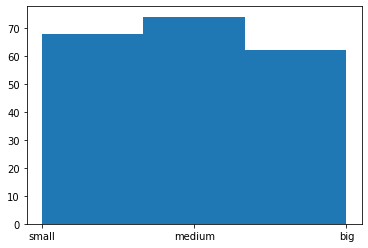

In [24]:
import matplotlib.pyplot as plt

plt.hist(df['bins'], bins=3)

## Sampling
Sampling is another technique of data binning. It permits to reduce the number of samples, by grouping similar values or contiguous values.
There are three approaches to perform sampling:
* by bin means: each value in a bin is replaced by the mean value of the bin.
* by bin median: each bin value is replaced by its bin median value.
* by bin boundary: each bin value is replaced by the closest boundary value, i.e. maximum or minimum value of the bin.

In order to perform sampling, the `binned_statistic()` function of the `scipy.stats` package can be used. This function receives two arrays as input, `x_data` and `y_data`, as well as the statistics to be used (e.g. median or mean) and the number of bins to be created. The function returns the values of the bins as well as the edges of each bin. We can calculate the `x` values (`x_bins`) corresponding to the binned values (`y_bins`) as the values at the center of the bin range.

In [50]:
from scipy.stats import binned_statistic
x_data = np.arange(0, len(df))
y_data = df['Cupcake']
y_bins,bin_edges, misc = binned_statistic(x_data,y_data, statistic="median", bins=10)
x_bins = (bin_edges[:-1]+bin_edges[1:])/2
x_bins

array([ 10.15,  30.45,  50.75,  71.05,  91.35, 111.65, 131.95, 152.25,
       172.55, 192.85])

Finally, we plot results.

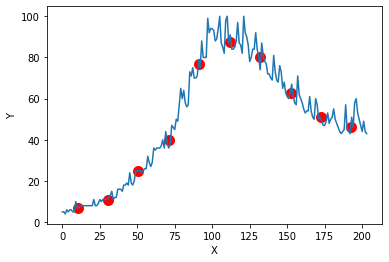

In [51]:
plt.plot(x_data,y_data)
plt.xlabel("X"); 
plt.ylabel("Y")

plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()